In [34]:
import praw
import csv
import re
import datetime
import pandas as pd

In [35]:
# Initialize the Reddit API client
reddit = praw.Reddit(client_id='30r6VEmx2PSWrP3_cGCWRQ', 
                     client_secret='nvGuUeGIjPGAGBY1rUrNNyrBXeIp6w', 
                     user_agent='Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36')



subreddit = reddit.subreddit('all')  # search across all subreddits

query = 'animal agriculture climate change'


In [36]:
comments = []

start_date = datetime.datetime(2018, 1, 1).timestamp()
end_date = datetime.datetime(2022, 12, 30).timestamp()

for post in subreddit.search(query, limit=1000):
    if start_date <= post.created_utc <= end_date:
        post.comments.replace_more(limit=None) # get all comments of the post
        for comment in post.comments.list():
            # Extract hashtags from comment body using regular expressions
            hashtags = re.findall(r'\#\w+', comment.body)
            # Append comment details and hashtags to the list
            comments.append({
                'post_title': post.title, # add post title to keep track of which post the comment belongs to
                'comment_body': comment.body,
                'score': comment.score,
                'id': comment.id,
                'created': comment.created_utc,
                'hashtags': ', '.join(hashtags) # Join the list of hashtags as a comma-separated string
            })

# Convert the list of comments to a pandas dataframe
data = pd.DataFrame(comments)

In [37]:
data

,post_title,comment_body,score,id,created,hashtags
0,Will the climate crisis lead to an early vegan...,\nThanks for posting to r/Vegan!\n\n**Please n...,1,id0j4u4,1.655692e+09,
1,Will the climate crisis lead to an early vegan...,Just got back from a climate change keynote Re...,6,id0np55,1.655694e+09,
2,Will the climate crisis lead to an early vegan...,If we can get animal welfare regulations then ...,3,id0lz0e,1.655693e+09,
3,Will the climate crisis lead to an early vegan...,Let's be real. People are fucking idiots. Smal...,3,id0v6s6,1.655699e+09,
4,Will the climate crisis lead to an early vegan...,I wish,2,id0kau3,1.655692e+09,
...,...,...,...,...,...,...
2921,And do it not only for them. Do it for the cli...,You are disregarding the complexity of the sub...,1,hg5tkaw,1.633906e+09,
2922,And do it not only for them. Do it for the cli...,"if i don't buy a dead animal's meat, it doesn'...",-2,hfwaeeq,1.633724e+09,
2923,And do it not only for them. Do it for the cli...,https://vegancalculator.com\n\nOne individual ...,6,hfwakub,1.633724e+09,
2924,And do it not only for them. Do it for the cli...,the vegan calculator is premised on the idea t...,-3,hfwojjj,1.633730e+09,


In [39]:

# Save the scraped data into a CSV file
#data.to_csv('reddit_comments.csv')

df1=pd.read_csv("reddit_comments.csv")

df1 = df1.drop_duplicates()


df1['created'] = pd.to_datetime(df1['created'], unit='s')



df1

,Unnamed: 0,post_title,comment_body,score,id,created,hashtags
0,0,Will the climate crisis lead to an early vegan...,\nThanks for posting to r/Vegan!\n\n**Please n...,1,id0j4u4,2022-06-20 02:20:48,NaN
1,1,Will the climate crisis lead to an early vegan...,Just got back from a climate change keynote Re...,6,id0np55,2022-06-20 03:03:41,NaN
2,2,Will the climate crisis lead to an early vegan...,If we can get animal welfare regulations then ...,3,id0lz0e,2022-06-20 02:47:26,NaN
3,3,Will the climate crisis lead to an early vegan...,Let's be real. People are fucking idiots. Smal...,3,id0v6s6,2022-06-20 04:20:03,NaN
4,4,Will the climate crisis lead to an early vegan...,I wish,2,id0kau3,2022-06-20 02:31:51,NaN
...,...,...,...,...,...,...,...
2921,2921,And do it not only for them. Do it for the cli...,You are disregarding the complexity of the sub...,1,hg5tkaw,2021-10-10 22:51:32,NaN
2922,2922,And do it not only for them. Do it for the cli...,"if i don't buy a dead animal's meat, it doesn'...",-2,hfwaeeq,2021-10-08 20:18:53,NaN
2923,2923,And do it not only for them. Do it for the cli...,https://vegancalculator.com\n\nOne individual ...,6,hfwakub,2021-10-08 20:20:07,NaN
2924,2924,And do it not only for them. Do it for the cli...,the vegan calculator is premised on the idea t...,-3,hfwojjj,2021-10-08 21:59:13,NaN


### NLP

In [40]:
# Import libraries
import nltk
import pandas as pd
import string
import random
import re
import io
# Import modules from nltk library
from nltk.corpus import subjectivity,stopwords
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.sentiment.util import extract_unigram_feats, mark_negation
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

exclude = set(string.punctuation)

In [41]:
my_stopwords=['the','a','an','and','by','for','of','i','im','he','she',
              'me','you','your','they','them','this','that','these','those',
              'is','am','are','was','has','had','have','be','in',
             'what','how','where','why']

In [42]:
#total_data = pd.read_csv('total_data_5000.csv')
df1['comments']=df1.comment_body.map(lambda x : ' '.join([x.lstrip('b')]))
df1['comments']=df1.comment_body.map(lambda x :''.join(re.sub("(@[\w]+)|(#)|(https?://[A-Za-z0-9./]*)|([0-9]+|\n)|([^0-9A-Za-z!? \t])|(\w+:\/\/\S+)|('rt')",'',x)).lower())
# remove the stopwords and punctuations
df1['comments']= df1['comments'].map(lambda x : ' '.join([token for token\
                                       in x.split() if token.lower() not in my_stopwords]))
df1['comments']= df1['comments'].map(lambda x :"".join(ch for ch in x if ch not in exclude))


In [43]:
df1

,Unnamed: 0,post_title,comment_body,score,id,created,hashtags,comments
0,0,Will the climate crisis lead to an early vegan...,\nThanks for posting to r/Vegan!\n\n**Please n...,1,id0j4u4,2022-06-20 02:20:48,NaN,thanks posting to rveganplease note civil disc...
1,1,Will the climate crisis lead to an early vegan...,Just got back from a climate change keynote Re...,6,id0np55,2022-06-20 03:03:41,NaN,just got back from climate change keynote re j...
2,2,Will the climate crisis lead to an early vegan...,If we can get animal welfare regulations then ...,3,id0lz0e,2022-06-20 02:47:26,NaN,if we can get animal welfare regulations then ...
3,3,Will the climate crisis lead to an early vegan...,Let's be real. People are fucking idiots. Smal...,3,id0v6s6,2022-06-20 04:20:03,NaN,lets real people fucking idiots small numbers ...
4,4,Will the climate crisis lead to an early vegan...,I wish,2,id0kau3,2022-06-20 02:31:51,NaN,wish
...,...,...,...,...,...,...,...,...
2921,2921,And do it not only for them. Do it for the cli...,You are disregarding the complexity of the sub...,1,hg5tkaw,2021-10-10 22:51:32,NaN,disregarding complexity subject sustainablytha...
2922,2922,And do it not only for them. Do it for the cli...,"if i don't buy a dead animal's meat, it doesn'...",-2,hfwaeeq,2021-10-08 20:18:53,NaN,if dont buy dead animals meat it doesnt save a...
2923,2923,And do it not only for them. Do it for the cli...,https://vegancalculator.com\n\nOne individual ...,6,hfwakub,2021-10-08 20:20:07,NaN,one individual going vegan drop bucket billion...
2924,2924,And do it not only for them. Do it for the cli...,the vegan calculator is premised on the idea t...,-3,hfwojjj,2021-10-08 21:59:13,NaN,vegan calculator premised on idea if dont eat ...


### Sentiment Analysis using EMPATH

In [44]:
#!pip install empath
import empath


In [45]:


# Load the comments DataFrame
comments = df1.copy()

# Create an Empath analyzer
analyzer = empath.Empath()

# Define a function to score the sentiment of a comment using Empath
def score_sentiment(comment):
    emotions = analyzer.analyze(comment)
    sentiment_score = sum(emotions.values())
    if sentiment_score > 0:
        sentiment_value = 'Positive'
    elif sentiment_score < 0:
        sentiment_value = 'Negative'
    else:
        sentiment_value = 'Neutral'
    return sentiment_score, sentiment_value

# Apply the sentiment scoring function to the 'comments' column
sentiment_scores = comments['comments'].apply(score_sentiment)

# Create new columns for the sentiment score and sentiment value
comments['sentiment_score'] = sentiment_scores.apply(lambda x: x[0])
comments['sentiment_value'] = sentiment_scores.apply(lambda x: x[1])

# Print the updated comments DataFrame
comments.head()


,Unnamed: 0,post_title,comment_body,score,id,created,hashtags,comments,sentiment_score,sentiment_value
0,0,Will the climate crisis lead to an early vegan...,\nThanks for posting to r/Vegan!\n\n**Please n...,1,id0j4u4,2022-06-20 02:20:48,NaN,thanks posting to rveganplease note civil disc...,127.0,Positive
1,1,Will the climate crisis lead to an early vegan...,Just got back from a climate change keynote Re...,6,id0np55,2022-06-20 03:03:41,NaN,just got back from climate change keynote re j...,61.0,Positive
2,2,Will the climate crisis lead to an early vegan...,If we can get animal welfare regulations then ...,3,id0lz0e,2022-06-20 02:47:26,NaN,if we can get animal welfare regulations then ...,72.0,Positive
3,3,Will the climate crisis lead to an early vegan...,Let's be real. People are fucking idiots. Smal...,3,id0v6s6,2022-06-20 04:20:03,NaN,lets real people fucking idiots small numbers ...,13.0,Positive
4,4,Will the climate crisis lead to an early vegan...,I wish,2,id0kau3,2022-06-20 02:31:51,NaN,wish,2.0,Positive


In [46]:
#comments.to_csv("reddit_eda.csv")

In [47]:
#comments=pd.read_csv("reddit_eda.csv")
comments

,Unnamed: 0,post_title,comment_body,score,id,created,hashtags,comments,sentiment_score,sentiment_value
0,0,Will the climate crisis lead to an early vegan...,\nThanks for posting to r/Vegan!\n\n**Please n...,1,id0j4u4,2022-06-20 02:20:48,NaN,thanks posting to rveganplease note civil disc...,127.0,Positive
1,1,Will the climate crisis lead to an early vegan...,Just got back from a climate change keynote Re...,6,id0np55,2022-06-20 03:03:41,NaN,just got back from climate change keynote re j...,61.0,Positive
2,2,Will the climate crisis lead to an early vegan...,If we can get animal welfare regulations then ...,3,id0lz0e,2022-06-20 02:47:26,NaN,if we can get animal welfare regulations then ...,72.0,Positive
3,3,Will the climate crisis lead to an early vegan...,Let's be real. People are fucking idiots. Smal...,3,id0v6s6,2022-06-20 04:20:03,NaN,lets real people fucking idiots small numbers ...,13.0,Positive
4,4,Will the climate crisis lead to an early vegan...,I wish,2,id0kau3,2022-06-20 02:31:51,NaN,wish,2.0,Positive
...,...,...,...,...,...,...,...,...,...,...
2921,2921,And do it not only for them. Do it for the cli...,You are disregarding the complexity of the sub...,1,hg5tkaw,2021-10-10 22:51:32,NaN,disregarding complexity subject sustainablytha...,2.0,Positive
2922,2922,And do it not only for them. Do it for the cli...,"if i don't buy a dead animal's meat, it doesn'...",-2,hfwaeeq,2021-10-08 20:18:53,NaN,if dont buy dead animals meat it doesnt save a...,17.0,Positive
2923,2923,And do it not only for them. Do it for the cli...,https://vegancalculator.com\n\nOne individual ...,6,hfwakub,2021-10-08 20:20:07,NaN,one individual going vegan drop bucket billion...,11.0,Positive
2924,2924,And do it not only for them. Do it for the cli...,the vegan calculator is premised on the idea t...,-3,hfwojjj,2021-10-08 21:59:13,NaN,vegan calculator premised on idea if dont eat ...,12.0,Positive


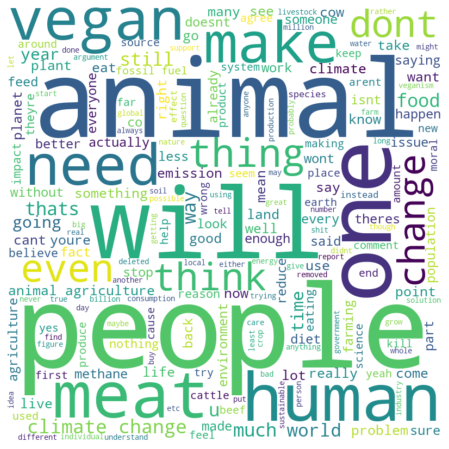

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# create a text string from the comments column
text = ' '.join(comments['comments'])

# create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=200).generate(text)

# plot the WordCloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


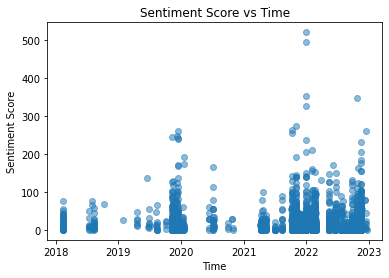

In [50]:
temp=comments.copy()
temp=temp[temp['created'].dt.year < 2023]
x = temp['created']
y = temp['sentiment_score']

plt.scatter(x, y, alpha=0.5)
plt.title('Sentiment Score vs Time')
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.show()

,Unnamed: 0,post_title,comment_body,score,id,created,hashtags,comments,sentiment_score,sentiment_value,created_at


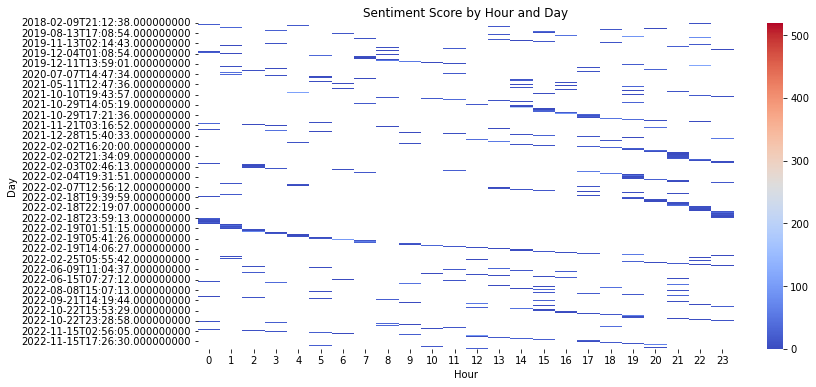

In [14]:

import seaborn as sns

# Group the data by date and calculate the average sentiment score
df_grouped = comments.groupby('created')['sentiment_score'].mean().reset_index()

# Extract the hour from the 'created' column
df_grouped['hour'] = df_grouped['created'].dt.hour

# Reshape the data for heatmap
heatmap_data = df_grouped.pivot('created', 'hour', 'sentiment_score')

# Create the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Sentiment Score by Hour and Day')
plt.xlabel('Hour')
plt.ylabel('Day')
plt.show()


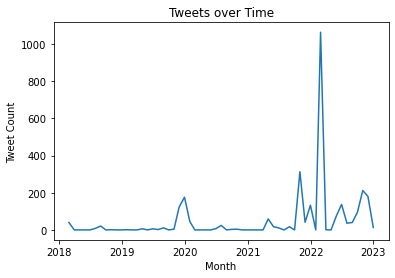

In [51]:


# Convert created_at column to datetime format
comments['created_at'] = pd.to_datetime(comments['created'])
# Group data by month and count the number of tweets
tweet_count = comments.groupby(pd.Grouper(key='created', freq='M')).size().reset_index(name='count')

# Plot a line chart of tweet count by month
plt.plot(tweet_count['created'], tweet_count['count'])
plt.xlabel('Month')
plt.ylabel('Tweet Count')
plt.title('Tweets over Time')
plt.show()


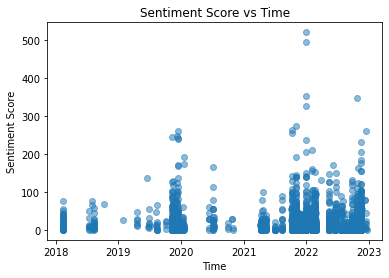

In [63]:
temp = comments.copy()
temp = temp[temp['created'].dt.year < 2023]

x = temp['created']
y = temp['sentiment_score']

plt.scatter(x, y, alpha=0.5)
plt.title('Sentiment Score vs Time')
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.show()


In [61]:
comments.dtypes

Unnamed: 0                  int64
post_title                 object
comment_body               object
score                       int64
id                         object
created            datetime64[ns]
hashtags                   object
comments                   object
sentiment_score           float64
sentiment_value            object
created_at         datetime64[ns]
dtype: object

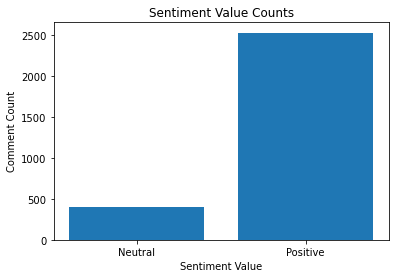

In [16]:
import matplotlib.pyplot as plt

# Group data by sentiment value and count the number of comments
sentiment_count = comments.groupby('sentiment_value')['comment_body'].count()

# Create a bar chart of the sentiment value counts
plt.bar(sentiment_count.index, sentiment_count.values)
plt.xlabel('Sentiment Value')
plt.ylabel('Comment Count')
plt.title('Sentiment Value Counts')
plt.show()


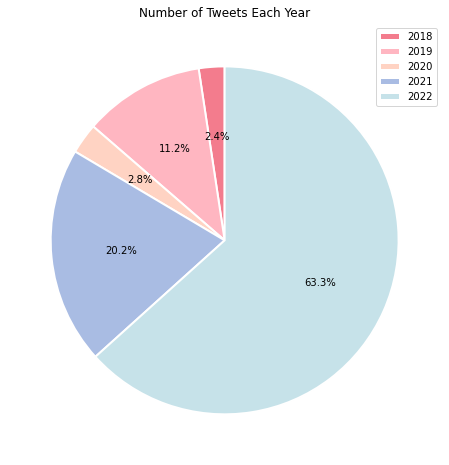

In [18]:
# Group data by year and count the number of tweets
tweet_count = comments.groupby(pd.Grouper(key='created', freq='Y')).size().reset_index(name='count')

# Define pastel colors
colors = ['#f37c8d', '#ffb6c1', '#ffd3c3', '#A9BCE3', '#C6E2E9', '#C1F0C9']
# Set the figure size
fig, ax = plt.subplots(figsize=(8, 8))

# Plot a pie chart of tweet count by year
wedges, labels, _ = ax.pie(tweet_count['count'], colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

# Add a legend
ax.legend(wedges, tweet_count['created'].dt.year, loc='upper right')

# Set the title
ax.set_title('Number of Tweets Each Year')

plt.show()


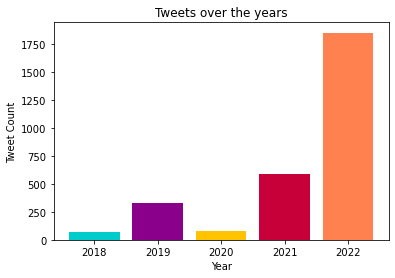

In [19]:
# Convert created_at column to datetime format
comments['created'] = pd.to_datetime(comments['created'])

# Group data by year and count the number of tweets
tweet_count = comments.groupby(pd.Grouper(key='created', freq='Y')).size().reset_index(name='count')

# Plot a bar chart of tweet count by year
plt.bar(tweet_count['created'].dt.year, tweet_count['count'], color=['#00CCCC','#8B008B','#FFC300','#C70039','#FF814F','#0077be'])
plt.xlabel('Year')
plt.ylabel('Tweet Count')
plt.title('Tweets over the years')
plt.show()


### Network Analysis

In [ ]:
# !pip install spacy
# !pip install nltk
# !pip install gensim
# !python -m spacy download en_core_web_sm


In [ ]:
# import nltk
# nltk.download('stopwords')


In [ ]:
import pandas as pd
from textblob import TextBlob

# Load tweets into a pandas dataframe

# Define a function to extract keywords from a tweet
def extract_keywords(tweet):
    blob = TextBlob(tweet)
    return [word for word, tag in blob.tags if tag in ('NN', 'NNS', 'NNP', 'NNPS')]

# Apply the function to each tweet and store the keywords in a separate column
comments['keywords'] = comments['comments'].apply(extract_keywords)

# Print the resulting dataframe
comments.head()


In [ ]:
comments['keywords']

In [ ]:
import networkx as nx

# create an empty graph
G = nx.Graph()

# get all unique keywords
keywords = set(comments['keywords'].sum())

# add nodes to the graph
for keyword in keywords:
    G.add_node(keyword)

# create edges between keywords that appear in the same comment
for comment_keywords in comments['keywords']:
    for keyword1 in comment_keywords:
        for keyword2 in comment_keywords:
            if keyword1 != keyword2:
                G.add_edge(keyword1, keyword2)

# set a threshold for minimum degree
degree_threshold = 500

# get nodes with degree >= threshold
nodes_to_keep = [n for n, d in G.degree() if d >= degree_threshold]

# create a new subgraph with only the nodes to keep
G_filtered = G.subgraph(nodes_to_keep)

print(nx.number_of_nodes(G_filtered)) # print the number of nodes in the filtered graph
print(nx.number_of_edges(G_filtered)) # print the number of nodes in the filtered graph
#nx.write_gml(G_filtered,"mygraph.gml")

In [ ]:
import pandas as pd
import collections
import matplotlib.pyplot as plt


# Extract the column containing the keywords
keywords = comments['keywords']

# Create a list of all the keywords
all_keywords = [keyword for sublist in keywords for keyword in sublist]

# Count the frequency of each keyword
keyword_freq = collections.Counter(all_keywords)

# Convert the counter object into a pandas DataFrame
df = pd.DataFrame.from_dict(keyword_freq, orient='index', columns=['count'])

# Sort the DataFrame by the count of each keyword in descending order
df = df.sort_values(by=['count'], ascending=False)

# Plot a bar graph of the top 30 keywords
df[:30].plot(kind='bar', figsize=(10, 5))
plt.title('Top 30 keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
import collections
import matplotlib.pyplot as plt


# Extract the column containing the keywords
keywords = comments['keywords']

# Create a list of all the keywords
all_keywords = [keyword for sublist in keywords for keyword in sublist]

# Count the frequency of each keyword
keyword_freq = collections.Counter(all_keywords)

# Convert the counter object into a pandas DataFrame
df = pd.DataFrame.from_dict(keyword_freq, orient='index', columns=['count'])

# Sort the DataFrame by the count of each keyword in descending order
df = df.sort_values(by=['count'], ascending=False)

# Plot a bar graph of the top 30 keywords
df[:30].plot(kind='bar', figsize=(10, 5), color=['#00CCCC','#8B008B','#FFC300','#C70039','#FF814F','#0077be'])
plt.title('Top 30 keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.show()
